## Tests

In [315]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [316]:
final_df = pd.read_csv('data/final_dataset.csv' )

In [317]:
final_df.columns

Index(['Name', 'Year', 'Countries', 'Genres', 'Budget(USD)', 'Domestic(USD)',
       'Domestic_Percentage', 'Foreign(USD)', 'Foreign_Percentage',
       'Worldwide(USD)', 'Runtime(mins)', 'Rating', 'Audience_Score',
       'Critics_Score'],
      dtype='object')

In [328]:
## CLEAN THE LINES WITH NEGATIVE OR INCORRECT WORLDWIDE GROSS
negative_Worldwide = len(final_df[final_df['Worldwide(USD)'] < 0])
incorrect_Worldwide = len(final_df[final_df['Worldwide(USD)'] != (final_df['Domestic(USD)'] + final_df['Foreign(USD)'])])

print(f"Negative worldwide gross rows: {negative_Worldwide}")
print(f"Incorrect worldwide gross rows: {incorrect_Worldwide}")

final_df_cleaned = final_df[
    (final_df['Worldwide(USD)'] >= 0) &
    (final_df['Worldwide(USD)'] == (final_df['Domestic(USD)'] + final_df['Foreign(USD)']))
]


len(final_df)


Negative worldwide gross rows: 0
Incorrect worldwide gross rows: 0


3866

In [329]:
## CLEAN THE PERCENTAGE COLUMNS
def percentage_to_float(x):
    return float(x.rstrip('%')) / 100 if isinstance(x, str) else x


columns_to_convert = ['Audience_Score', 'Critics_Score']
final_df_cleaned[columns_to_convert] = final_df_cleaned[columns_to_convert].map(percentage_to_float)

In [331]:
final_df_cleaned = final_df_cleaned.dropna()
final_df_cleaned

,Name,Year,Countries,Genres,Budget(USD),Domestic(USD),Domestic_Percentage,Foreign(USD),Foreign_Percentage,Worldwide(USD),Runtime(mins),Rating,Audience_Score,Critics_Score
0,10 cloverfield lane,2016,united states,"drama, horror, sci-fi, thriller",5000000,72082999,0.654010,38134000,0.345990,110216999,103,pg-13,0.79,0.91
1,10 things i hate about you,1999,united states of america,"romantic comedy, romance film, coming of age, ...",13000000,38178166,0.713446,15334203,0.286554,53512369,97,pg-13,0.69,0.71
2,"10,000 bc",2008,"united states of america, south africa, new ze...","thriller, adventure, costume drama, action/adv...",105000000,94784201,0.351333,175000000,0.648667,269784201,109,pg-13,0.37,0.10
3,12 monkeys,1995,united states,"mystery, sci-fi, thriller",29000000,57141459,0.338437,111698000,0.661563,168839459,129,r,0.88,0.88
4,12 rounds,2009,united states of america,"action thrillers, thriller, action, crime fiction",20000000,12234694,0.708013,5045632,0.291987,17280326,108,pg-13,0.45,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3861,zoolander,2001,"united states of america, australia, germany","parody, comedy of errors, comedy",28000000,45172250,0.743197,15608731,0.256803,60780981,90,pg-13,0.80,0.64
3862,zoolander 2,2016,united states,"action, adventure, comedy, mystery, romance",50000000,28848693,0.508592,27874000,0.491408,56722693,101,pg-13,0.20,0.22
3863,zoom,2006,united states of america,"science fiction, action, fantasy, adventure",35000000,11989328,0.958658,517034,0.041342,12506362,93,pg,0.34,0.05
3864,zootopia,2016,united states,"action, adventure, animation, comedy, crime, f...",150000000,341268248,0.333340,682515947,0.666660,1023784195,108,pg,0.92,0.98


### Distribution of Years
FILTER THE YEARS WITH FEW MOVIES

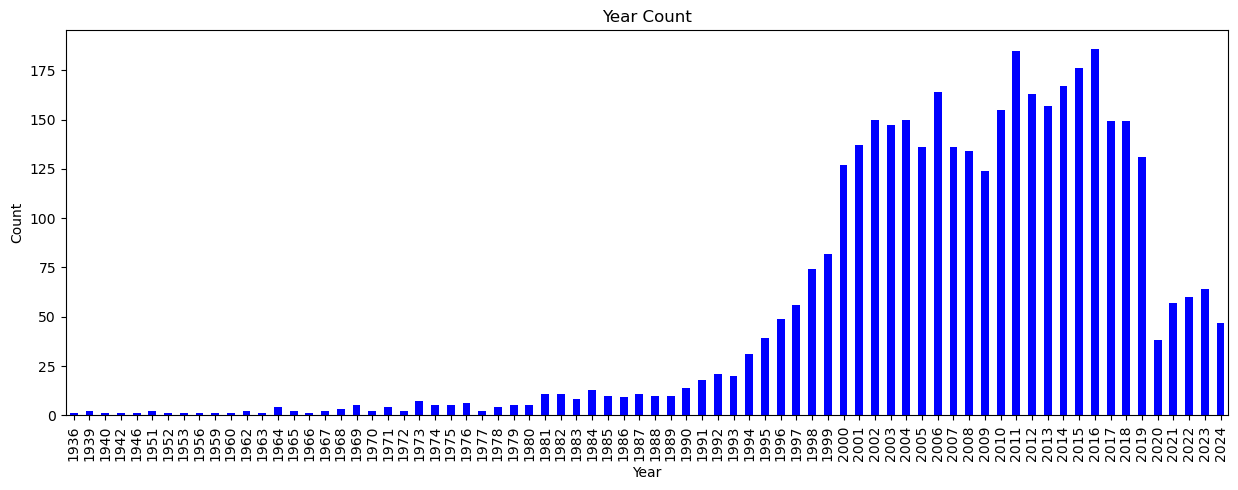

In [332]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_years contains the year data
df_copy = final_df_cleaned.copy(deep=True)
df_years = df_copy['Year'].dropna()
years_count = df_years.explode().value_counts()
years_count = years_count.sort_index(ascending=True)
years_count.plot(kind='bar', color='blue', figsize=(15, 5))

plt.title('Year Count')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


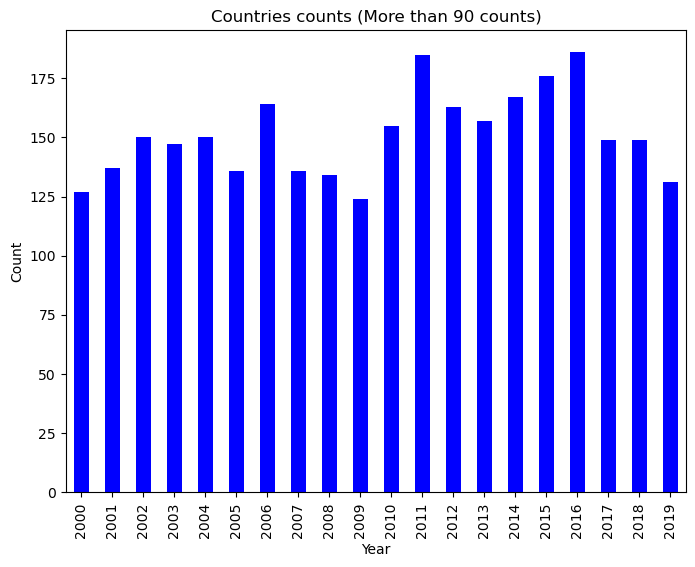

In [333]:
## with filtering ..
count_threshold = 90
df_years_count = years_count[years_count > count_threshold]
plt.figure(figsize=(8, 6))
df_years_count.plot(kind='bar', color='blue')
plt.title(f'Countries counts (More than {count_threshold} counts)')
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

We can see that the period between 2000-2010 has the most amount of movies released. We should take this into consideration when doing our Time Series analysis.

In [334]:
final_df_cleaned = final_df_cleaned[final_df_cleaned['Year'].isin(df_years_count.index)]

In [335]:
final_df_cleaned.Year.value_counts()

Year
2016    186
2011    185
2015    176
2014    167
2006    164
2012    163
2013    157
2010    155
2004    150
2002    150
2017    149
2018    149
2003    147
2001    137
2005    136
2007    136
2008    134
2019    131
2000    127
2009    124
Name: count, dtype: int64

### Consider Inflation..

In [336]:

data = {
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 
             2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 
             2020, 2021, 2022, 2023],
    'Inflation_Rate': [3.40, 1.60, 2.40, 1.90, 3.30, 3.40, 2.50, 4.10, 0.10, 2.70,
                       1.50, 3.00, 1.70, 1.50, 0.80, 0.70, 2.10, 2.10, 1.90, 2.30,
                       1.40, 7.00, 6.50, 3.40],

}

inflation_df = pd.DataFrame(data)
inflation_df['Cumulative_Inflation'] = (1 + inflation_df['Inflation_Rate'] / 100).cumprod() - 1
inflation_df['Cumulative_Inflation'] = inflation_df['Cumulative_Inflation'] - inflation_df['Cumulative_Inflation'].iloc[0]
inflation_df.head(5)


,Year,Inflation_Rate,Cumulative_Inflation
0,2000,3.4,0.000000
1,2001,1.6,0.016544
2,2002,2.4,0.041757
3,2003,1.9,0.062196
4,2004,3.3,0.098371


In [337]:
## consider my dataset with inflation:.. 
final_inflated = final_df_cleaned.copy(deep = True)
final_inflated['Cumulative_Inflation'] = final_df_cleaned['Year'].apply(lambda x: inflation_df['Cumulative_Inflation'].iloc[2023- x])
## apply inflation: 
final_inflated['Worldwide(USD)'] = final_inflated['Worldwide(USD)'] * (1 + final_inflated['Cumulative_Inflation'])
final_inflated['Domestic(USD)'] = final_inflated['Domestic(USD)'] * (1 + final_inflated['Cumulative_Inflation'])
final_inflated['Foreign(USD)'] = final_inflated['Foreign(USD)'] * (1 + final_inflated['Cumulative_Inflation'])
final_inflated['Budget(USD)'] = final_inflated['Budget(USD)'] * (1 + final_inflated['Cumulative_Inflation'])
final_inflated['Domestic_Percentage'] = final_inflated['Domestic(USD)'] / final_inflated['Worldwide(USD)']
final_inflated['Foreign_Percentage'] = final_inflated['Foreign(USD)'] / final_inflated['Worldwide(USD)']

final_inflated.rename(columns = {'Worldwide(USD)': 'Worldwide(USD)_Inflated', 'Domestic(USD)': 'Domestic(USD)_Inflated', 'Foreign(USD)': 'Foreign(USD)_Inflated', 'Budget(USD)': 'Budget(USD)_Inflated'}, inplace = True)

In [338]:
final_inflated

,Name,Year,Countries,Genres,Budget(USD)_Inflated,Domestic(USD)_Inflated,Domestic_Percentage,Foreign(USD)_Inflated,Foreign_Percentage,Worldwide(USD)_Inflated,Runtime(mins),Rating,Audience_Score,Critics_Score,Cumulative_Inflation
0,10 cloverfield lane,2016,united states,"drama, horror, sci-fi, thriller",6.076746e+06,8.760602e+07,0.654010,4.634613e+07,0.345990,1.339521e+08,103,pg-13,0.79,0.91,0.215349
2,"10,000 bc",2008,"united states of america, south africa, new ze...","thriller, adventure, costume drama, action/adv...",1.441563e+08,1.301309e+08,0.351333,2.402606e+08,0.648667,3.703914e+08,109,pg-13,0.37,0.10,0.372917
4,12 rounds,2009,united states of america,"action thrillers, thriller, action, crime fiction",2.726275e+07,1.667757e+07,0.708013,6.877890e+06,0.291987,2.355546e+07,108,pg-13,0.45,0.31,0.363138
5,12 strong,2018,united states,"action, drama, history, war",3.979050e+07,5.209113e+07,0.644274,2.876133e+07,0.355726,8.085246e+07,130,r,0.62,0.50,0.136872
6,12 years a slave,2013,united states of america,"biography, drama, history",2.539260e+07,7.195247e+07,0.301875,1.663993e+08,0.698125,2.383517e+08,134,r,0.90,0.95,0.269630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3861,zoolander,2001,"united states of america, australia, germany","parody, comedy of errors, comedy",4.851315e+07,7.826600e+07,0.743197,2.704388e+07,0.256803,1.053099e+08,90,pg-13,0.80,0.64,0.732612
3862,zoolander 2,2016,united states,"action, adventure, comedy, mystery, romance",6.076746e+07,3.506124e+07,0.508592,3.387664e+07,0.491408,6.893788e+07,101,pg-13,0.20,0.22,0.215349
3863,zoom,2006,united states of america,"science fiction, action, fantasy, adventure",5.014200e+07,1.717625e+07,0.958658,7.407176e+05,0.041342,1.791697e+07,93,pg,0.34,0.05,0.432628
3864,zootopia,2016,united states,"action, adventure, animation, comedy, crime, f...",1.823024e+08,4.147601e+08,0.333340,8.294952e+08,0.666660,1.244255e+09,108,pg,0.92,0.98,0.215349


## Examining the dataset

Countries movie count

In [339]:
final_inflated.value_counts("Countries").head(10)

Countries
united states of america                             1740
united states                                         273
united states of america, germany                      94
united states of america, united kingdom               79
united kingdom                                         64
united states of america, canada                       60
united states of america, australia                    35
united kingdom, united states of america               34
france                                                 23
united states of america, united kingdom, germany      21
Name: count, dtype: int64

Number of countries with more than 500 movie counts


As expected, the large majority of movies originate from the United States, which justifies our main focus on American movies. We do see, however, that there are a fair amount of movies from India, the United Kingdom, and France. We can use these as starting off points for our case studies later on. 

Due to the dominance of American movies in the dataset, it comes as no surprise that English is therefore the language at the forefront of our dataset.

Min and Max Year and Revenue

In [340]:
final_inflated.columns

Index(['Name', 'Year', 'Countries', 'Genres', 'Budget(USD)_Inflated',
       'Domestic(USD)_Inflated', 'Domestic_Percentage',
       'Foreign(USD)_Inflated', 'Foreign_Percentage',
       'Worldwide(USD)_Inflated', 'Runtime(mins)', 'Rating', 'Audience_Score',
       'Critics_Score', 'Cumulative_Inflation'],
      dtype='object')

In [341]:
print(f"Minimum year is {final_inflated.Year.min()}")
print(f"Maximum year is {final_inflated.Year.max()}")
print(f"Minimum revenue is {final_inflated['Worldwide(USD)_Inflated'].min()}")
print(f"Maximum revenue is {final_inflated['Worldwide(USD)_Inflated'].max()}")

Minimum year is 2000
Maximum year is 2019
Minimum revenue is 14438.532698530247
Maximum revenue is 3784540437.008462


# Basic Analysis on our Megaset

### Foreign & Domestic Percentages Distribution

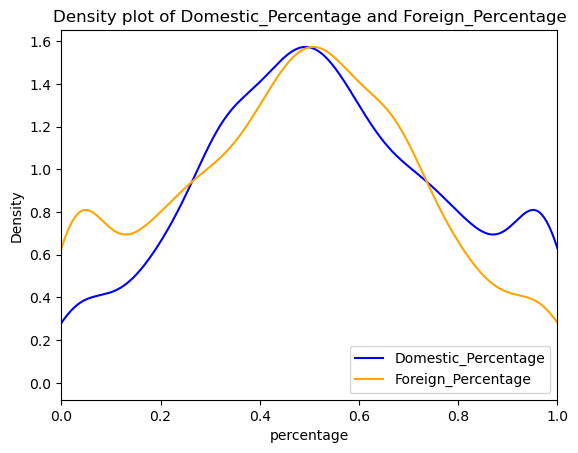

In [342]:
df_copy = final_inflated.copy(deep=True)
df_percentage = final_inflated.dropna(subset=['Domestic_Percentage', 'Foreign_Percentage'])

df_percentage.Domestic_Percentage.plot.density(color='blue')
df_percentage.Foreign_Percentage.plot.density(color='orange')

plt.title('Density plot of Domestic_Percentage and Foreign_Percentage')
plt.xlabel('percentage')
plt.xlim(0, 1)
plt.legend(["Domestic_Percentage", "Foreign_Percentage"], loc="lower right")
plt.show()



Most movies share their money-making between home and abroad, with many movies around the 50% split. However, some movies rely more on foreign audiences to make money.

## Features affecting the foreign percentage, and foreign gross

In [ ]:
all_genres = (
    final_inflated['Genres']
    .dropna()  # Removing NaN values from the Genres column
    .str.replace('/', ', ')  # Replacing slashes with a comma and space
    .str.split(', ')  # Splitting by comma and space
    .explode()  # Flattening the list of genres into individual rows
    .value_counts()  # Counting occurrences of each genre
)
top_20_genres = all_genres.head(20).index
top_20_genres

Index(['drama', 'comedy', 'action', 'thriller', 'adventure', 'romance film',
       'horror', 'fantasy', 'mystery', 'crime fiction', 'romantic comedy',
       'indie', 'biography', 'science fiction', 'family film', 'period piece',
       'crime', 'sci-fi', 'romance', 'crime thriller'],
      dtype='object', name='Genres')

In [ ]:
final_inflated.columns

Index(['Name', 'Year', 'Countries', 'Genres', 'Budget(USD)_Inflated',
       'Domestic(USD)_Inflated', 'Domestic_Percentage',
       'Foreign(USD)_Inflated', 'Foreign_Percentage',
       'Worldwide(USD)_Inflated', 'Runtime(mins)', 'Rating', 'Audience_Score',
       'Critics_Score', 'Cumulative_Inflation'],
      dtype='object')

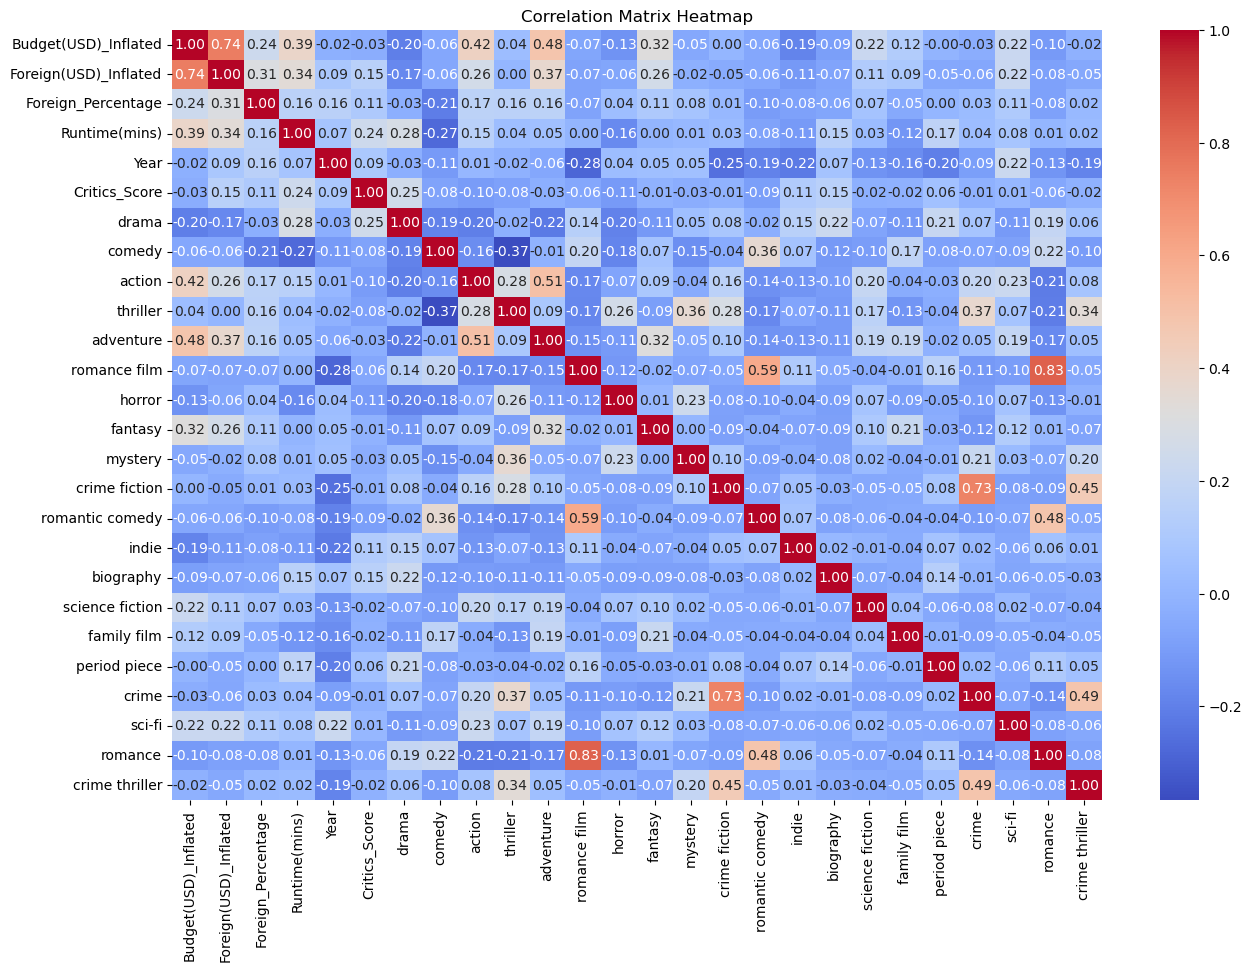

In [356]:
correlation_df = final_inflated.copy()
correlation_df['Genres'] = correlation_df['Genres'].str.replace('/', ', ')

# Create a column for each genre in the top 20
for genre in top_20_genres:
    correlation_df[genre] = correlation_df['Genres'].str.contains(genre).astype(int)
    
correlation_matrix = correlation_df[['Budget(USD)_Inflated', 'Foreign(USD)_Inflated', 'Foreign_Percentage', 'Runtime(mins)', 'Year', 'Critics_Score'] + list(top_20_genres)].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Proportion of Domestic vs Foreign gross for US movies over time

Domestic vs Foreign Income, Total and Percentage, for American movies over time

In [357]:
year_min = final_inflated['Year'].min()
year_max = final_inflated['Year'].max()

print(f"The range of the 'Year' column is: {year_min} to {year_max}")

The range of the 'Year' column is: 2000 to 2019


In [ ]:
# ANALYSING ONLY UNITED STATES
df_gross = final_inflated.drop(columns=['Budget(USD)_Inflated', 'Genres'])
df_gross = df_gross[df_gross['Countries'].str.contains('united states', na=False)]
df_gross = df_gross.dropna()
df_gross

,Name,Year,Countries,Domestic(USD)_Inflated,Domestic_Percentage,Foreign(USD)_Inflated,Foreign_Percentage,Worldwide(USD)_Inflated,Runtime(mins),Rating,Audience_Score,Critics_Score,Cumulative_Inflation
0,10 cloverfield lane,2016,united states,8.760602e+07,0.654010,4.634613e+07,0.345990,1.339521e+08,103,pg-13,0.79,0.91,0.215349
2,"10,000 bc",2008,"united states of america, south africa, new ze...",1.301309e+08,0.351333,2.402606e+08,0.648667,3.703914e+08,109,pg-13,0.37,0.10,0.372917
4,12 rounds,2009,united states of america,1.667757e+07,0.708013,6.877890e+06,0.291987,2.355546e+07,108,pg-13,0.45,0.31,0.363138
5,12 strong,2018,united states,5.209113e+07,0.644274,2.876133e+07,0.355726,8.085246e+07,130,r,0.62,0.50,0.136872
6,12 years a slave,2013,united states of america,7.195247e+07,0.301875,1.663993e+08,0.698125,2.383517e+08,134,r,0.90,0.95,0.269630
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3861,zoolander,2001,"united states of america, australia, germany",7.826600e+07,0.743197,2.704388e+07,0.256803,1.053099e+08,90,pg-13,0.80,0.64,0.732612
3862,zoolander 2,2016,united states,3.506124e+07,0.508592,3.387664e+07,0.491408,6.893788e+07,101,pg-13,0.20,0.22,0.215349
3863,zoom,2006,united states of america,1.717625e+07,0.958658,7.407176e+05,0.041342,1.791697e+07,93,pg,0.34,0.05,0.432628
3864,zootopia,2016,united states,4.147601e+08,0.333340,8.294952e+08,0.666660,1.244255e+09,108,pg,0.92,0.98,0.215349


The code below designs a histogram which gives the distribution of movies produced per year. 

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

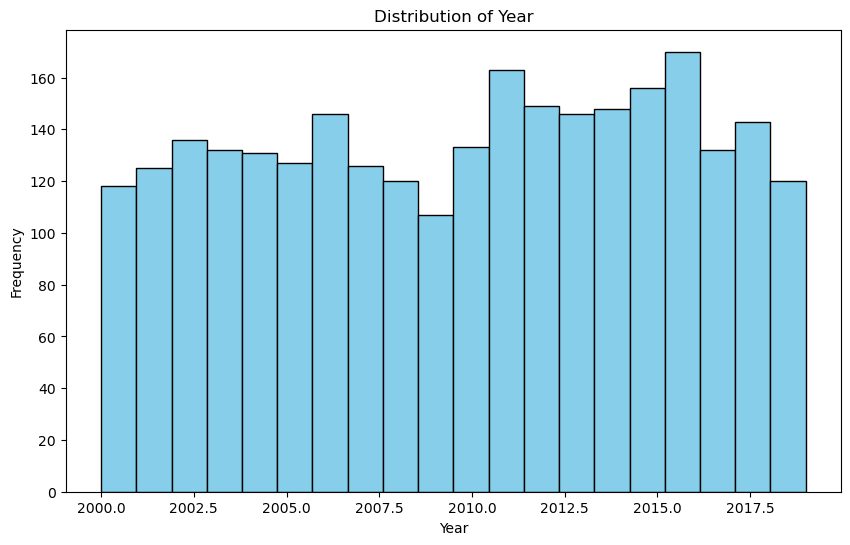

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_gross['Year'].dropna(), bins=20, edgecolor='black', color='skyblue')
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid

The histogram demonstrates a clear bias in the dataset towards movies that were produced more recently, this could in large part be down to the increased collection of data once the information age arrived.

In [ ]:
year_min = df_gross['Year'].min()
year_max = df_gross['Year'].max()

print(f"The range of the 'Year' column is: {year_min} to {year_max}")


The range of the 'Year' column is: 2000 to 2019


In order to see how the worldwide gross for US films has changed over time, we use a scatterplot for each of the American movies in our dataset.

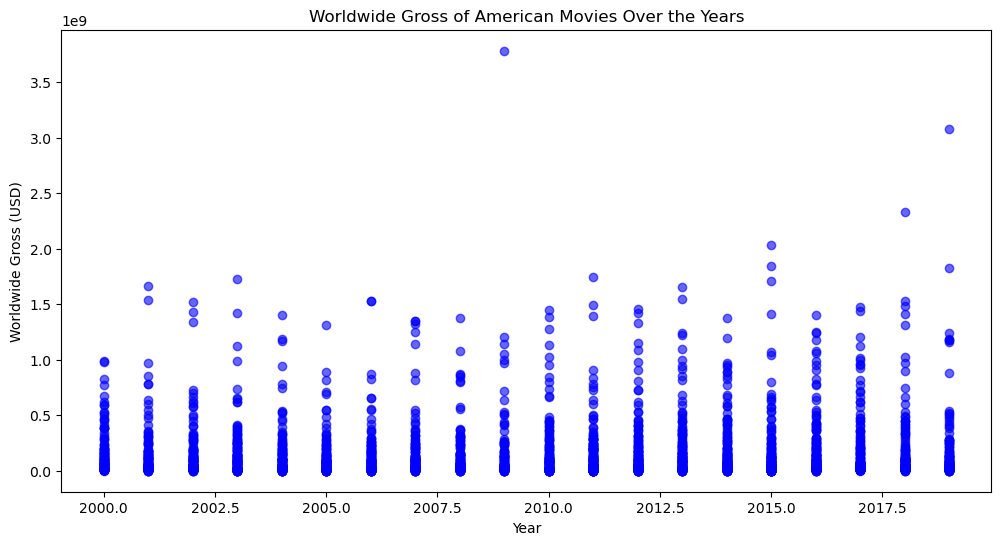

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df_gross['Year'], df_gross['Worldwide(USD)_Inflated'], color='blue', alpha=0.6)

plt.xlabel('Year')
plt.ylabel('Worldwide Gross (USD)')
plt.title('Worldwide Gross of American Movies Over the Years')

plt.show()

The scatterplot does not show any clear trend towards an overall increase in worldwide gross as we approach the present day despite factors like inflation which would have suggested an increase.

The bar chart featured below was created with the intent of checking the trends in average worldwide gross per year (from 2000 to 2016) with a domestic/foreign gross split.

In [ ]:
df_gross = df_gross[(df_gross['Year'] > 2000)&(df_gross['Year'] < 2019)]

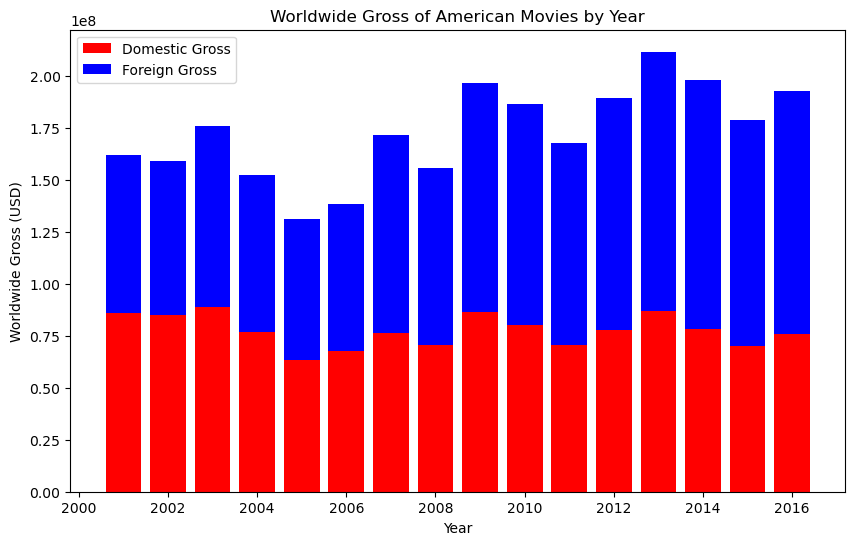

In [ ]:
yearly_data = df_gross.groupby('Year')[['Domestic(USD)_Inflated', 'Foreign(USD)_Inflated']].mean()

plt.figure(figsize=(10, 6))
plt.bar(yearly_data.index, yearly_data['Domestic(USD)_Inflated'], color='red', label='Domestic Gross')
plt.bar(yearly_data.index, yearly_data['Foreign(USD)_Inflated'], bottom=yearly_data['Domestic(USD)_Inflated'], color='blue', label='Foreign Gross')

plt.xlabel('Year')
plt.ylabel('Worldwide Gross (USD)')
plt.title('Worldwide Gross of American Movies by Year')
plt.legend()

plt.show()

As can be seen above, the gross overall has increased through the years with in general the foreign gross outpacing the domestic gross.

The lineplots below were made to showcase how the share of domestic vs foreign income changes over time.

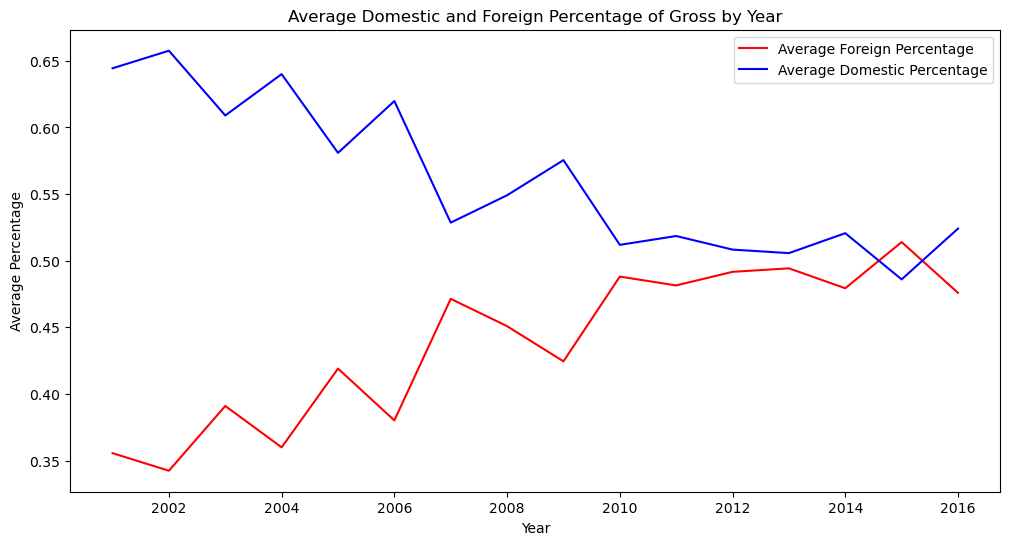

In [ ]:
average_percentages = df_gross.groupby('Year')[['Foreign_Percentage', 'Domestic_Percentage']].mean()

plt.figure(figsize=(12, 6))

plt.plot(average_percentages.index, average_percentages['Foreign_Percentage'], color='red', label='Average Foreign Percentage')

plt.plot(average_percentages.index, average_percentages['Domestic_Percentage'], color='blue', label='Average Domestic Percentage')

plt.xlabel('Year')
plt.ylabel('Average Percentage')
plt.title('Average Domestic and Foreign Percentage of Gross by Year')
plt.legend()

plt.show()

The graph above clearly shows that the domestic share of the total revenue has fallen from 2000 onwards, and consequentially the inverse is true for the foreign share.

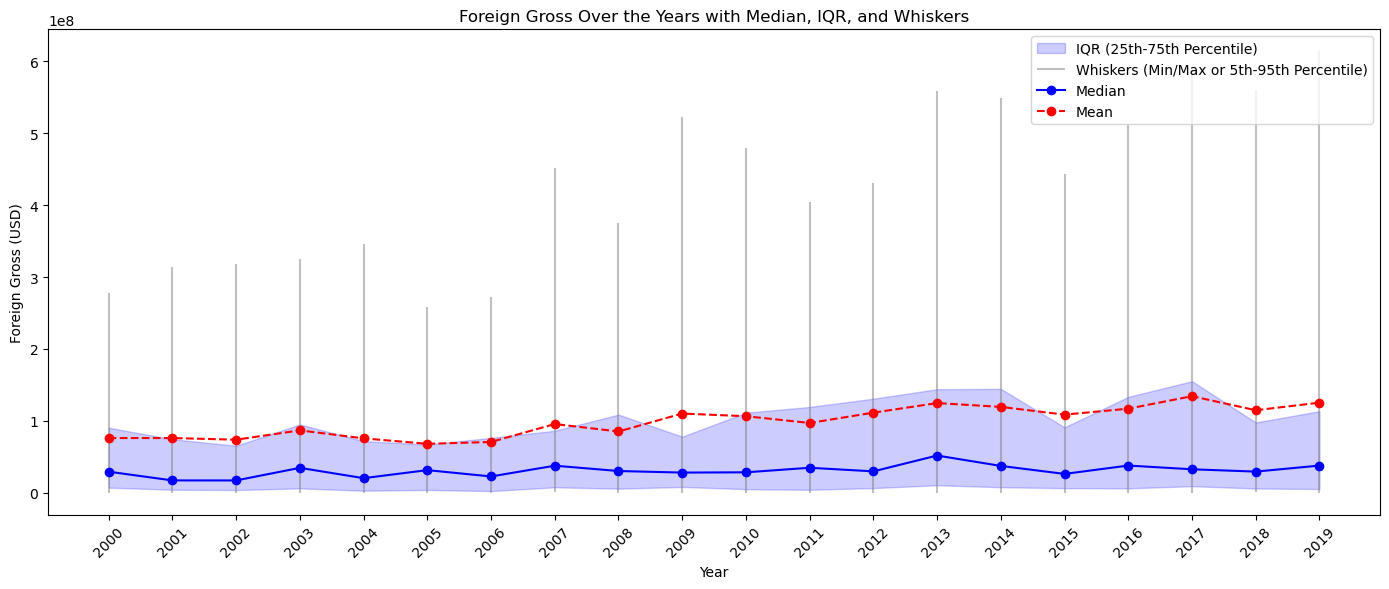

In [ ]:
## SHOWING FOREIGN GROS
df_gross_filtered = df_gross[['Year', 'Foreign(USD)_Inflated']].dropna()
df_gross_filtered['Year'] = df_gross_filtered['Year'].astype(int)

# Group by 'Year' and calculate summary statistics
yearly_stats = df_gross_filtered.groupby('Year')['Foreign(USD)_Inflated'].agg(
    median='median',
    mean='mean',
    q25=lambda x: np.percentile(x, 25),  # 25th percentile
    q75=lambda x: np.percentile(x, 75),  # 75th percentile
    whisker_low=lambda x: max(np.min(x), np.percentile(x, 5)),  # Min or 5th percentile
    whisker_high=lambda x: min(np.max(x), np.percentile(x, 95))  # Max or 95th percentile
).reset_index()

# Plotting
plt.figure(figsize=(14, 6))

# Shaded area for IQR (25th to 75th percentile)
plt.fill_between(
    yearly_stats['Year'], 
    yearly_stats['q25'], 
    yearly_stats['q75'], 
    color='blue', 
    alpha=0.2, 
    label='IQR (25th-75th Percentile)'
)

# Whiskers for the range (5th to 95th percentile or min/max)
plt.vlines(
    x=yearly_stats['Year'], 
    ymin=yearly_stats['whisker_low'], 
    ymax=yearly_stats['whisker_high'], 
    color='gray', 
    alpha=0.5, 
    linewidth=1.5, 
    label='Whiskers (Min/Max or 5th-95th Percentile)'
)

plt.plot(yearly_stats['Year'], yearly_stats['median'], color='blue', linestyle='-', marker='o', label='Median')
plt.plot(yearly_stats['Year'], yearly_stats['mean'], color='red', linestyle='--', marker='o', label='Mean')
plt.xlabel('Year')
plt.ylabel('Foreign Gross (USD)')
plt.title('Foreign Gross Over the Years with Median, IQR, and Whiskers')
plt.legend()
plt.xticks(ticks=yearly_stats['Year'], rotation=45)
plt.tight_layout()
plt.show()


nOTICE THAT THE OUTLIERS VALUES HAS INCREASED IN THE LAST YEARS

In [ ]:
correlation_df.Rating.value_counts()

Rating
R                                                                     1446
PG-13                                                                 1163
PG                                                                     504
G                                                                       76
Not Rated                                                               44
NC-17                                                                   10
GP                                                                       2
G(Rating bulletin 2156, 1/26/2011)                                       2
R Edited                                                                 2
G(Rating bulletin 2111, 3/10/2010)                                       1
PG Rating                                                                1
PG on appeal. Originally rated R.                                        1
PG-13 Rating is                                                          1
Approved          

# Genre Preference

Preferences in genre in US vs World for american movies (plotting the most common genres, showcasing their corresponding foreign vs domestic gross)

In [291]:
final_inflated.columns

Index(['Name', 'Year', 'Countries', 'Genres', 'Budget(USD)_Inflated',
       'Domestic(USD)_Inflated', 'Domestic_Percentage',
       'Foreign(USD)_Inflated', 'Foreign_Percentage',
       'Worldwide(USD)_Inflated', 'Runtime(mins)', 'Rating', 'Audience_Score',
       'Critics_Score', 'Cumulative_Inflation'],
      dtype='object')

Getting a list of all genres and choosing the most common 20

In [398]:

# Getting the genre list and its count
# Replacing the slashes with commas to ensure a splitting when encountering commas and slashes
all_genres = (
    final_inflated['Genres']
    .dropna()  # Removing NaN values from the Genres column
    .str.replace('/', ', ')  # Replacing slashes with a comma and space
    .str.split(', ')  # Splitting by comma and space
    .explode()  # Flattening the list of genres into individual rows
    .value_counts()  # Counting occurrences of each genre
)
top_20_genres = all_genres.head(20).index
top_20_genres

Index(['drama', 'comedy', 'action', 'thriller', 'adventure', 'romance film',
       'horror', 'fantasy', 'mystery', 'crime fiction', 'romantic comedy',
       'indie', 'biography', 'science fiction', 'family film', 'period piece',
       'crime', 'sci-fi', 'romance', 'crime thriller'],
      dtype='object', name='Genres')

Plotting a bar plot showcasing the sum of the domestic and foregin gross for each chosen genre

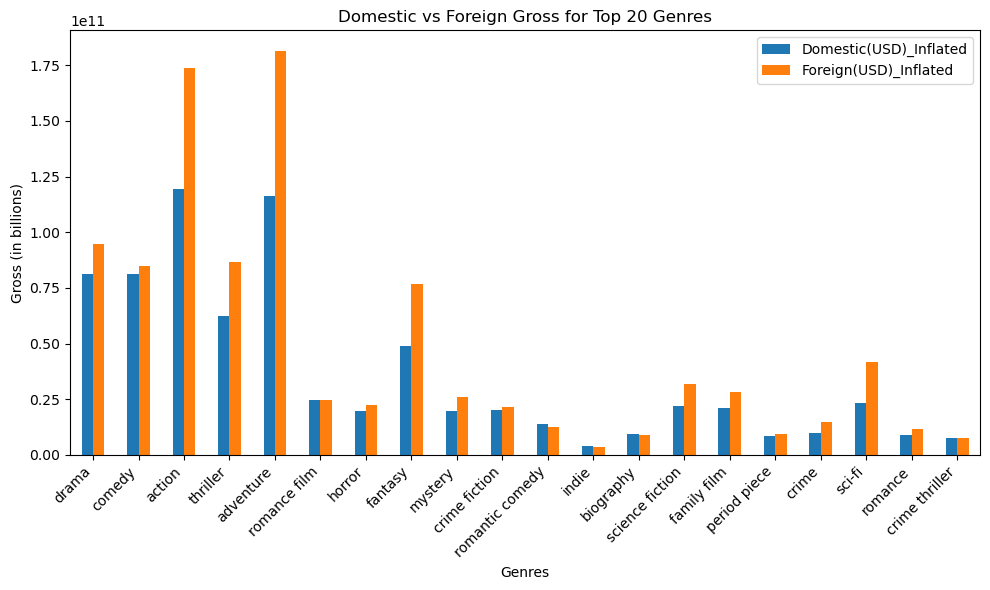

In [399]:
# Creating a new DataFrame excluding rows with NaN in the relevant columns so it doesn't affect the final plots
filtered_df = final_inflated.dropna(subset=['Genres', 'Domestic(USD)_Inflated', 'Foreign(USD)_Inflated'])

# Initializing a dictionary to store gross for each genre in the top 20
genre_gross = {genre: {'Domestic(USD)_Inflated': 0, 'Foreign(USD)_Inflated': 0} for genre in top_20_genres}

# Iterating through the filtered dataset and summing gross for each genre
for idx, row in filtered_df.iterrows():
    genres = str(row['Genres']).replace('/', ', ').split(', ')# Splitting the genres of the current movie ('/' and ', ' considered as separations)
    domestic = row['Domestic(USD)_Inflated']                          # Storing the corresponding Domestic(USD) value
    foreign = row['Foreign(USD)_Inflated']                            # Storing the corresponding Foreign(USD) value
    
    for genre in genres:
        # If the genre is in the top 20, we sum the gross to that genre
        if genre in top_20_genres:
            genre_gross[genre]['Domestic(USD)_Inflated'] += domestic
            genre_gross[genre]['Foreign(USD)_Inflated'] += foreign

# Converting the dictionary into a DataFrame for plotting
df_genre_gross = pd.DataFrame(genre_gross).T  # Transposing
df_genre_gross = df_genre_gross[['Domestic(USD)_Inflated', 'Foreign(USD)_Inflated']]  # Keeping only the relevant columns for plotting

# Plotting 
df_genre_gross.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Domestic vs Foreign Gross for Top 20 Genres')
plt.ylabel('Gross (in billions)')
plt.xlabel('Genres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [167]:
final_df.columns

Index(['Name', 'Year', 'Languages', 'Countries', 'Genres', 'Budget',
       'domestic_gross', 'domestic_percentage', 'foreign_gross',
       'foreign_percentage', 'worldwide_gross', 'Runtime', 'Rating'],
      dtype='object')

C:\Users\giada\AppData\Local\Temp\ipykernel_24012\2871463301.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\giada\AppData\Local\Temp\ipykernel_24012\2871463301.py:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




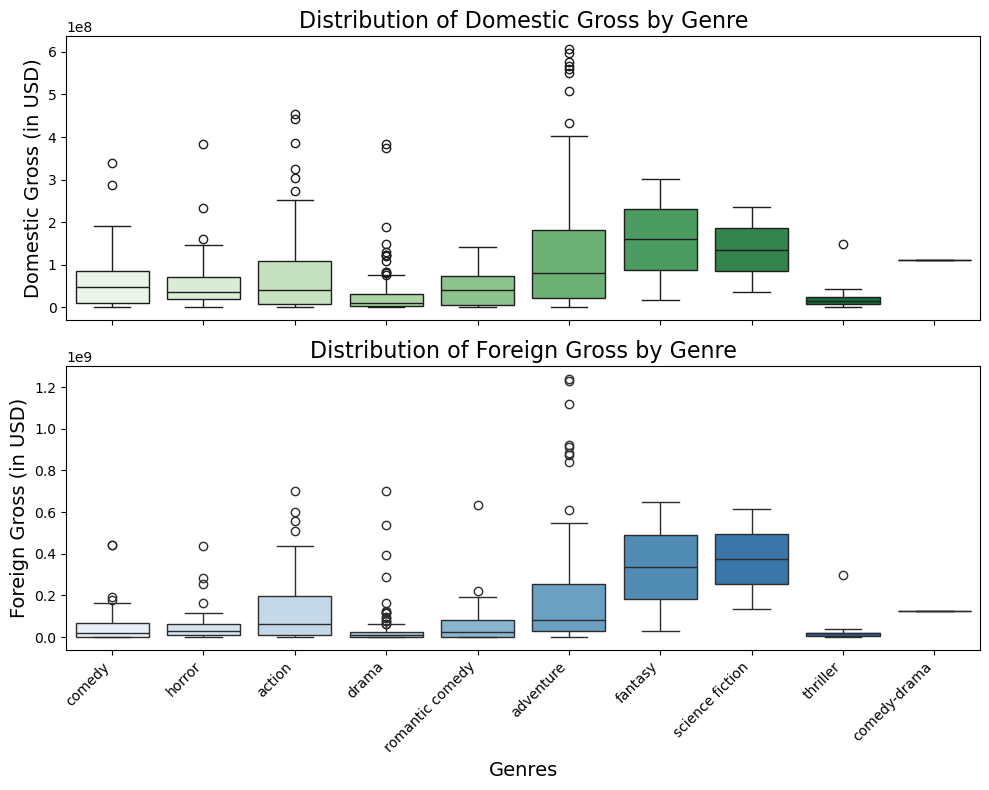

In [295]:
filtered_df = final_inflated.dropna(subset=['Genres', 'Domestic(USD)_Inflated', 'Foreign(USD)_Inflated'])

# Expand the Genres column into individual rows for each genre
genres_expanded = filtered_df.copy()
genres_expanded['Genres'] = genres_expanded['Genres'].str.replace('/', ', ')
genres_expanded = genres_expanded.explode('Genres')

# Filter for only top 20 genres if required
top_20_genres = ['drama', 'action', 'comedy', 'adventure', 'thriller', 'romance film',
       'crime fiction', 'romantic comedy', 'fantasy', 'family film', 'indie',
       'horror', 'period piece', 'mystery', 'science fiction',
       'crime thriller', 'film adaptation', 'romantic drama', 'comedy-drama',
       'teen']
genres_expanded = genres_expanded[genres_expanded['Genres'].isin(top_20_genres)]

fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Domestic Gross Boxplot
sns.boxplot(
    data=genres_expanded, 
    x='Genres', 
    y='Domestic(USD)_Inflated', 
    showfliers=True, 
    palette='Greens', 
    ax=axes[0]
)
axes[0].set_title('Distribution of Domestic Gross by Genre', fontsize=16)
axes[0].set_xlabel('')
axes[0].set_ylabel('Domestic Gross (in USD)', fontsize=14)

# Foreign Gross Boxplot
sns.boxplot(
    data=genres_expanded, 
    x='Genres', 
    y='Foreign(USD)_Inflated', 
    showfliers=True, 
    palette='Blues', 
    ax=axes[1]
)
axes[1].set_title('Distribution of Foreign Gross by Genre', fontsize=16)
axes[1].set_xlabel('Genres', fontsize=14)
axes[1].set_ylabel('Foreign Gross (in USD)', fontsize=14)

# Customize the layout
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


This bar plot showcases the dominance of foreign gross (orange) over domestic gross (blue) across all of the top 20 genres, especially for action, adventure, drama, thriller and family film; indicating strong international appeal. In contrast, genres like comedy, romance film and crime fiction show a more balanced domestic and foreign gross, suggesting greater resonance with U.S. audiences. Overall, while this chart reveals genre-specific market preferences, it is susceptible to skewing, as genres with more movies will naturally have higher gross totals.

Plotting a bar plot showcasing the average of the domestic and foreign gross percentage for each chosen genre

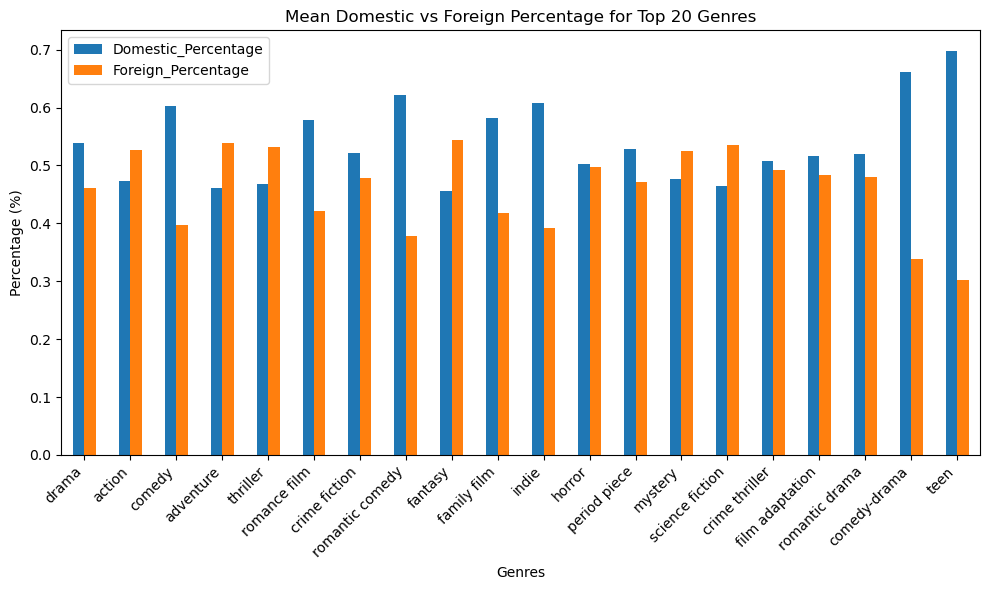

In [297]:
# Creating a new DataFrame excluding rows with NaN in the relevant columns so it doesn't affect the final plots
filtered_df = final_inflated.dropna(subset=['Genres', 'Domestic_Percentage', 'Foreign_Percentage'])

# Initializing a dictionary to store mean percentages for each genre in the top 20
genre_percentages = {genre: {'Domestic_Percentage': [], 'Foreign_Percentage': []} for genre in top_20_genres}

# Iterating through the filtered dataset and collecting percentages for each genre
for idx, row in filtered_df.iterrows():
    genres = str(row['Genres']).replace('/', ', ').split(', ')# Splitting the genres of the current movie ('/' and ', ' considered as separations)
    Domestic_Percentage = row['Domestic_Percentage']          # Storing the corresponding Domestic_Percentage value
    Foreign_Percentage = row['Foreign_Percentage']            # Storing the corresponding Foreign_Percentage value
    
    for genre in genres:
        # If the genre is in the top 20, we collect the percentages for that genre
        if genre in top_20_genres:
            genre_percentages[genre]['Domestic_Percentage'].append(Domestic_Percentage)
            genre_percentages[genre]['Foreign_Percentage'].append(Foreign_Percentage)

# Calculating the mean percentages for each genre
mean_percentages = {
    genre: {
        'Domestic_Percentage': sum(values['Domestic_Percentage']) / len(values['Domestic_Percentage']),
        'Foreign_Percentage': sum(values['Foreign_Percentage']) / len(values['Foreign_Percentage']),
    }
    for genre, values in genre_percentages.items() if len(values['Domestic_Percentage']) > 0
}

# Converting the dictionary into a DataFrame for plotting
df_genre_percentages = pd.DataFrame(mean_percentages).T  # Transposing
df_genre_percentages = df_genre_percentages[['Domestic_Percentage', 'Foreign_Percentage']]  # Keeping only the relevant columns for plotting

# Plotting 
df_genre_percentages.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Mean Domestic vs Foreign Percentage for Top 20 Genres')
plt.ylabel('Percentage (%)')
plt.xlabel('Genres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


This bar plot shows the mean domestic and foreign percentages for the top 20 genres, offering a more accurate representation by averaging the percentages rather than summing gross values. Unlike the previous graph, which is heavily influenced by the number of movies in each genre, this plot minimizes that impact, providing a clearer view of each genre's relative appeal. Notably, foreign percentages remain high across most genres, though the differences are less pronounced than in the total gross comparison.

We thus observe different trends, with genres like drama, crime fiction, indie, and especially comedy showing a higher mean domestic percentage compared to their foreign counterpart.

In [22]:
## what are the genres that attract most the foreigh audience vs domestic audience?

In [23]:
!pip install plotly

In [26]:
final_df.columns

Index(['Name', 'Year', 'Languages', 'Countries', 'Genres', 'Budget',
       'domestic_gross', 'domestic_percentage', 'foreign_gross',
       'foreign_percentage', 'worldwide_gross', 'Runtime', 'Rating'],
      dtype='object')

In [ ]:
import pandas as pd
import plotly.express as px

filtered_df = final_inflated.dropna(subset=['Year', 'Genres', 'Domestic(USD)_Inflated', 'Foreign(USD)_Inflated'])
filtered_df['Year'] = filtered_df['Year'].astype(int)

filtered_df['Genres'] = filtered_df['Genres'].str.split(', ') 
genre_year_df = filtered_df.explode('Genres')

# Filter to only include top 20 genres
genre_year_df = genre_year_df[genre_year_df['Genres'].isin(top_20_genres)]

# Group by Genre and Year and aggregate earnings data
genre_year_data = genre_year_df.groupby(['Genres', 'Year']).agg(
    Total_Domestic = pd.NamedAgg(column='Domestic(USD)_Inflated', aggfunc='sum'),
    Total_Foreign = pd.NamedAgg(column='Foreign(USD)_Inflated', aggfunc='sum'),
    Total_Film_Count = pd.NamedAgg(column='Name', aggfunc='count')
).reset_index()

genre_year_data['Domestic_Percentage'] = (genre_year_data['Total_Domestic'] / (genre_year_data['Total_Domestic'] + genre_year_data['Total_Foreign'])) * 100
genre_year_data['Foreign_Percentage'] = (genre_year_data['Total_Foreign'] / (genre_year_data['Total_Domestic'] + genre_year_data['Total_Foreign'])) * 100

# Bar chart showing the total earnings and film count by genre
fig1 = px.bar(
    genre_year_data, 
    x='Genres', 
    y='Total_Film_Count', 
    title="Number of Films per Genre",
    labels={'Total_Film_Count': 'Number of Films'},
    color='Genres',
    color_discrete_sequence=px.colors.qualitative.Set2
)

# Bar chart showing the total earnings per genre (Domestic vs Foreign)
fig2 = px.bar(
    genre_year_data, 
    x='Genres', 
    y=['Total_Domestic', 'Total_Foreign'], 
    title="Total Earnings (Domestic vs Foreign) per Genre",
    labels={'value': 'Total Earnings (in USD)', 'variable': 'Type of Earnings'},
    barmode='group', 
    color_discrete_sequence=px.colors.qualitative.Set1
)

# Adding line plot showing earnings per year
fig3 = px.line(
    genre_year_data,
    x='Year',
    y=['Total_Domestic', 'Total_Foreign'],
    color='Genres',
    title="Earnings per Genre Over the Years",
    labels={'value': 'Earnings (in USD)', 'Year': 'Year'},
    line_shape='linear'
)

# Update Layout for bar charts
fig1.update_layout(
    xaxis=dict(title="Genres", tickangle=45),
    yaxis=dict(title="Number of Films"),
    legend_title_text="Genres",
    title_x=0.5,
    height=600,
    width=1000
)

fig2.update_layout(
    xaxis=dict(title="Genres", tickangle=45),
    yaxis=dict(title="Total Earnings (in USD)"),
    legend_title_text="Type of Earnings",
    title_x=0.5,
    height=600,
    width=1000
)






ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('Genres=action<br>variable=Tota' ... 's (in USD)=%{y}<extra></extra>'),
              'legendgroup': 'action',
              'line': {'color': '#636efa', 'dash': 'solid', 'shape': 'linear'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'action',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
                          2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]),
              'xaxis': 'x',
              'y': array([4.49758149e+09, 3.76499589e+09, 4.01986812e+09, 4.46923798e+09,
                          3.37079443e+09, 2.51390920e+09, 4.01922688e+09, 2.77966798e+09,
                          4.77403511e+09, 4.41931619e+09, 3.95546239e+09, 4.49825128e+09,
                          4.61062220e+09, 4.64411782e+09, 5.64119885e+09, 4.52387974e+09,
                          6.14138388e+09, 5.17467450e+09, 6.01558232e+09, 3.61879395e+09]),
              'yaxis': 'y'},
             {'hovertemplate': ('Genres=action<br>variable=Tota' ... 's (in USD)=%{y}<extra></extra>'),
              'legendgroup': 'action',
              'line': {'color': '#636efa', 'dash': 'solid', 'shape': 'linear'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'action',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
                          2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]),
              'xaxis': 'x',
              'y': array([4.39221522e+09, 3.70867014e+09, 4.09659692e+09, 4.99967630e+09,
                          4.44966942e+09, 3.46816136e+09, 5.04038135e+09, 3.93609019e+09,
                          5.99530412e+09, 7.19225835e+09, 5.67116355e+09, 7.88692490e+09,
                          7.20318913e+09, 7.91612303e+09, 1.00729221e+10, 9.81770454e+09,
                          1.11356827e+10, 9.89946631e+09, 1.05948548e+10, 6.68793301e+09]),
              'yaxis': 'y'},
             {'hovertemplate': ('Genres=adventure<br>variable=T' ... 's (in USD)=%{y}<extra></extra>'),
              'legendgroup': 'adventure',
              'line': {'color': '#EF553B', 'dash': 'solid', 'shape': 'linear'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'adventure',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
                          2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]),
              'xaxis': 'x',
              'y': array([2.85589832e+09, 3.61285961e+09, 4.07094186e+09, 4.18417803e+09,
                          3.19665603e+09, 2.37635364e+09, 4.23322324e+09, 3.57827476e+09,
                          2.36658962e+09, 4.18333777e+09, 4.43825978e+09, 3.58539616e+09,
                          3.37564514e+09, 4.85631833e+09, 4.86726029e+09, 5.57903464e+09,
                          6.17911115e+09, 5.05608618e+09, 5.92394400e+09, 5.75060620e+09]),
              'yaxis': 'y'},
             {'hovertemplate': ('Genres=adventure<br>variable=T' ... 's (in USD)=%{y}<extra></extra>'),
              'legendgroup': 'adventure',
              'line': {'color': '#EF553B', 'dash': 'solid', 'shape': 'linear'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'adventure',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
                          2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]),
              'xaxis':

In [403]:
fig1.update_layout(
    xaxis=dict(title="Genres", tickangle=45),
    yaxis=dict(title="Number of Films"),
    legend_title_text="Genres",
    title_x=0.5,
    height=600,
    width=1000
)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Genres=%{x}<br>Number of Films=%{y}<extra></extra>',
              'legendgroup': 'action',
              'marker': {'color': 'rgb(102,194,165)', 'pattern': {'shape': ''}},
              'name': 'action',
              'offsetgroup': 'action',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['action', 'action', 'action', 'action', 'action', 'action', 'action',
                          'action', 'action', 'action', 'action', 'action', 'action', 'action',
                          'action', 'action', 'action', 'action', 'action', 'action'],
                         dtype=object),
              'xaxis': 'x',
              'y': array([34, 38, 36, 37, 30, 33, 35, 30, 43, 29, 35, 48, 40, 36, 47, 44, 52, 40,
                          50, 37], dtype=int64),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'Genres=%{x}<br>Number of Films=%{y}<extra></extra>',
              'legendgroup': 'adventure',
              'marker': {'color': 'rgb(252,141,98)', 'pattern': {'shape': ''}},
              'name': 'adventure',
              'offsetgroup': 'adventure',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['adventure', 'adventure', 'adventure', 'adventure', 'adventure',
                          'adventure', 'adventure', 'adventure', 'adventure', 'adventure',
                          'adventure', 'adventure', 'adventure', 'adventure', 'adventure',
                          'adventure', 'adventure', 'adventure', 'adventure', 'adventure'],
                         dtype=object),
              'xaxis': 'x',
              'y': array([23, 21, 28, 27, 23, 25, 34, 22, 24, 20, 23, 27, 21, 29, 36, 41, 46, 31,
                          39, 35], dtype=int64),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'Genres=%{x}<br>Number of Films=%{y}<extra></extra>',
              'legendgroup': 'biography',
              'marker': {'color': 'rgb(141,160,203)', 'pattern': {'shape': ''}},
              'name': 'biography',
              'offsetgroup': 'biography',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['biography', 'biography', 'biography', 'biography', 'biography',
                          'biography', 'biography', 'biography', 'biography', 'biography',
                          'biography', 'biography', 'biography', 'biography', 'biography',
                          'biography', 'biography', 'biography', 'biography', 'biography'],
                         dtype=object),
              'xaxis': 'x',
              'y': array([ 6,  6,  6,  8, 11,  9,  8,  8,  4,  7,  8,  4,  1, 12, 16, 20, 19, 12,
                          19, 11], dtype=int64),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'Genres=%{x}<br>Number of Films=%{y}<extra></extra>',
              'legendgroup': 'comedy',
              'marker': {'color': 'rgb(231,138,195)', 'pattern': {'shape': ''}},
              'name': 'comedy',
              'offsetgroup': 'comedy',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['comedy', 'comedy', 'comedy', 'comedy', 'comedy', 'comedy', 'comedy',
                          'comedy', 'comedy', 'comedy', 'comedy', 'comedy', 'comedy', 'comedy',
                          'comedy', 'comedy', 'comedy', 'comedy', 'comedy', 'comedy'],
                         dtype=object),
              'xaxis': 'x',
              'y': array([53, 69, 57, 63, 69, 54, 67, 48, 47, 49, 61, 64, 47, 47, 

In [402]:
fig3.update_layout(
    xaxis=dict(title="Year", tickangle=45),
    yaxis=dict(title="Earnings (in USD)"),
    legend_title_text="Genres",
    title_x=0.5,
    height=600,
    width=1000
)




ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('Genres=action<br>variable=Tota' ... 's (in USD)=%{y}<extra></extra>'),
              'legendgroup': 'action',
              'line': {'color': '#636efa', 'dash': 'solid', 'shape': 'linear'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'action',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
                          2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]),
              'xaxis': 'x',
              'y': array([4.49758149e+09, 3.76499589e+09, 4.01986812e+09, 4.46923798e+09,
                          3.37079443e+09, 2.51390920e+09, 4.01922688e+09, 2.77966798e+09,
                          4.77403511e+09, 4.41931619e+09, 3.95546239e+09, 4.49825128e+09,
                          4.61062220e+09, 4.64411782e+09, 5.64119885e+09, 4.52387974e+09,
                          6.14138388e+09, 5.17467450e+09, 6.01558232e+09, 3.61879395e+09]),
              'yaxis': 'y'},
             {'hovertemplate': ('Genres=action<br>variable=Tota' ... 's (in USD)=%{y}<extra></extra>'),
              'legendgroup': 'action',
              'line': {'color': '#636efa', 'dash': 'solid', 'shape': 'linear'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'action',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
                          2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]),
              'xaxis': 'x',
              'y': array([4.39221522e+09, 3.70867014e+09, 4.09659692e+09, 4.99967630e+09,
                          4.44966942e+09, 3.46816136e+09, 5.04038135e+09, 3.93609019e+09,
                          5.99530412e+09, 7.19225835e+09, 5.67116355e+09, 7.88692490e+09,
                          7.20318913e+09, 7.91612303e+09, 1.00729221e+10, 9.81770454e+09,
                          1.11356827e+10, 9.89946631e+09, 1.05948548e+10, 6.68793301e+09]),
              'yaxis': 'y'},
             {'hovertemplate': ('Genres=adventure<br>variable=T' ... 's (in USD)=%{y}<extra></extra>'),
              'legendgroup': 'adventure',
              'line': {'color': '#EF553B', 'dash': 'solid', 'shape': 'linear'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'adventure',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
                          2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]),
              'xaxis': 'x',
              'y': array([2.85589832e+09, 3.61285961e+09, 4.07094186e+09, 4.18417803e+09,
                          3.19665603e+09, 2.37635364e+09, 4.23322324e+09, 3.57827476e+09,
                          2.36658962e+09, 4.18333777e+09, 4.43825978e+09, 3.58539616e+09,
                          3.37564514e+09, 4.85631833e+09, 4.86726029e+09, 5.57903464e+09,
                          6.17911115e+09, 5.05608618e+09, 5.92394400e+09, 5.75060620e+09]),
              'yaxis': 'y'},
             {'hovertemplate': ('Genres=adventure<br>variable=T' ... 's (in USD)=%{y}<extra></extra>'),
              'legendgroup': 'adventure',
              'line': {'color': '#EF553B', 'dash': 'solid', 'shape': 'linear'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'adventure',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
                          2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]),
              'xaxis':

In [31]:
!pip install plotly --upgrade


## Budget Influence

Budget vs Foreign and Domestic Income for American Movies

In [404]:
def remove_high_val(x):
    x = float(x)
    if x > 1:
        return False
    return True

Initial length of the dataset: 3023
Length after removing all the NaNs: 3023
-----------------------------------------------


c:\Users\giada\.conda\envs\ada\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Pearson coefficient on Budget and Domestic Percentage:
PearsonRResult(statistic=-0.23652250592179194, pvalue=1.0481988971429101e-39)


c:\Users\giada\.conda\envs\ada\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Pearson coefficient on Budget and Foreign Percentage:
PearsonRResult(statistic=0.23652250592179191, pvalue=1.0481988971429101e-39)


,Name,Budget(USD)_Inflated,Domestic_Percentage,Foreign_Percentage
0,10 cloverfield lane,6.076746e+06,0.654010,0.345990
2,"10,000 bc",1.441563e+08,0.351333,0.648667
4,12 rounds,2.726275e+07,0.708013,0.291987
5,12 strong,3.979050e+07,0.644274,0.355726
6,12 years a slave,2.539260e+07,0.301875,0.698125


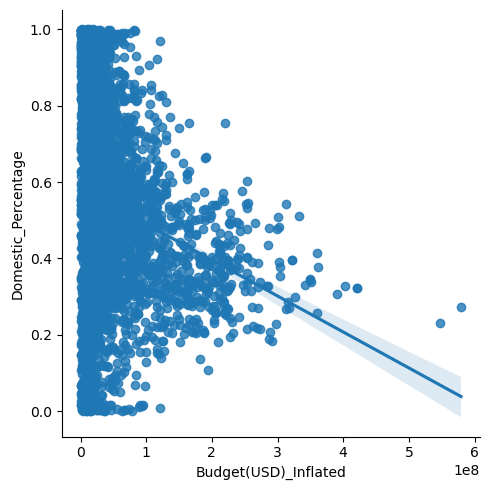

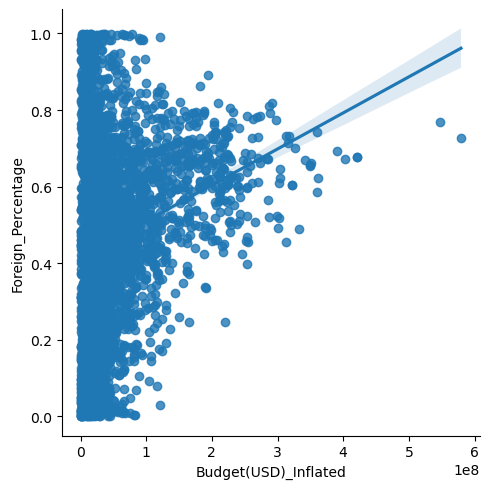

In [405]:
import seaborn as sns
from scipy import stats

df_meg_copy = final_inflated.copy(deep=True)
df_meg_copy = df_meg_copy[['Name', 'Budget(USD)_Inflated', 'Domestic_Percentage', 'Foreign_Percentage']]

print(f"Initial length of the dataset: {len(df_meg_copy)}")

df_meg_copy = df_meg_copy[df_meg_copy['Budget(USD)_Inflated'].notna()]
df_meg_copy = df_meg_copy[df_meg_copy['Domestic_Percentage'].notna()]
df_meg_copy = df_meg_copy[df_meg_copy['Foreign_Percentage'].notna()]

print(f"Length after removing all the NaNs: {len(df_meg_copy)}")
print("-----------------------------------------------")

df_meg_copy = df_meg_copy[df_meg_copy['Foreign_Percentage'] < 1]

sns.lmplot(x='Budget(USD)_Inflated', y='Domestic_Percentage', data=df_meg_copy)
print("Pearson coefficient on Budget and Domestic Percentage:")
print(stats.pearsonr(df_meg_copy['Budget(USD)_Inflated'], df_meg_copy['Domestic_Percentage']))

sns.lmplot(x='Budget(USD)_Inflated', y='Foreign_Percentage', data=df_meg_copy)
print("Pearson coefficient on Budget and Foreign Percentage:")
print(stats.pearsonr(df_meg_copy['Budget(USD)_Inflated'], df_meg_copy['Foreign_Percentage']))

df_meg_copy.head()



The two graphs above show a correlation where as budget increases, the income percentage that comes from foreign markets increases while it decreases for domestic markets.

## Does runtime actually have an impact on the foreign gross?

Very weak correlation, but it seems to be that the movies with longer runtime fair better abroad in terms of percentage than domenstically, probably because the longer films are most lickely the blockbusters...
could filter out the action movies..

Initial length of the dataset: 3023
Length after removing all the NaNs: 3023
-----------------------------------------------


c:\Users\giada\.conda\envs\ada\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Pearson coeff on runtime and domestic gross (inflated)
PearsonRResult(statistic=0.31367815670927934, pvalue=5.210917314581307e-70)


c:\Users\giada\.conda\envs\ada\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Pearson coeff on runtime and foreign gross (inflated)
PearsonRResult(statistic=0.34229097012158194, pvalue=7.565053696250843e-84)


,Name,Budget(USD)_Inflated,Runtime(mins),Domestic(USD)_Inflated,Foreign(USD)_Inflated,Domestic_Percentage,Foreign_Percentage
0,10 cloverfield lane,6.076746e+06,103,8.760602e+07,4.634613e+07,0.654010,0.345990
2,"10,000 bc",1.441563e+08,109,1.301309e+08,2.402606e+08,0.351333,0.648667
4,12 rounds,2.726275e+07,108,1.667757e+07,6.877890e+06,0.708013,0.291987
5,12 strong,3.979050e+07,130,5.209113e+07,2.876133e+07,0.644274,0.355726
6,12 years a slave,2.539260e+07,134,7.195247e+07,1.663993e+08,0.301875,0.698125


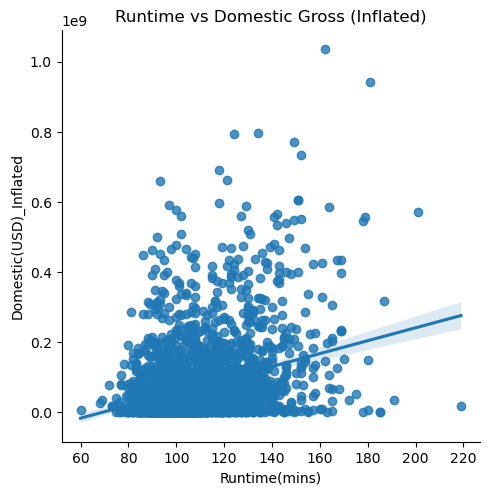

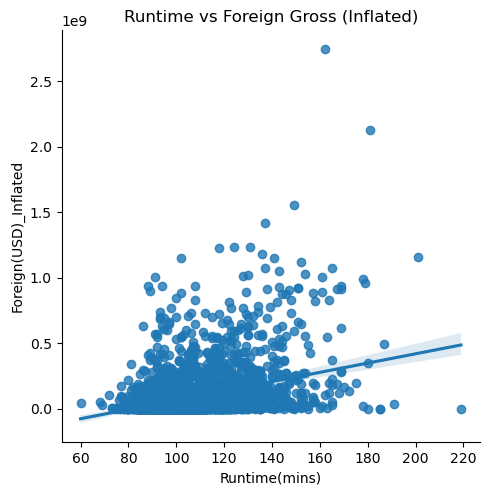

In [ ]:


# Copy and filter the dataset
df_meg_copy = final_inflated.copy(deep=True)
df_meg_copy = df_meg_copy[['Name', 'Budget(USD)_Inflated', 'Runtime(mins)', 'Domestic(USD)_Inflated', 
                           'Foreign(USD)_Inflated', 'Domestic_Percentage', 'Foreign_Percentage']]

print(f"Initial length of the dataset: {len(df_meg_copy)}")

df_meg_copy = df_meg_copy[df_meg_copy['Runtime(mins)'].notna()]
df_meg_copy = df_meg_copy[df_meg_copy['Domestic(USD)_Inflated'].notna()]
df_meg_copy = df_meg_copy[df_meg_copy['Foreign(USD)_Inflated'].notna()]
df_meg_copy = df_meg_copy[df_meg_copy['Runtime(mins)'] != 0]
print(f"Length after removing all the NaNs: {len(df_meg_copy)}")
print("-----------------------------------------------")

# Plot for domestic gross vs runtime
sns.lmplot(x='Runtime(mins)', y='Domestic(USD)_Inflated', data=df_meg_copy)
plt.title('Runtime vs Domestic Gross (Inflated)')

# Pearson correlation for domestic gross
print("Pearson coeff on runtime and domestic gross (inflated)")
print(stats.pearsonr(df_meg_copy['Runtime(mins)'], df_meg_copy['Domestic(USD)_Inflated']))

# Plot for foreign gross vs runtime
sns.lmplot(x='Runtime(mins)', y='Foreign(USD)_Inflated', data=df_meg_copy)
plt.title('Runtime vs Foreign Gross (Inflated)')

# Pearson correlation for foreign gross
print("Pearson coeff on runtime and foreign gross (inflated)")
print(stats.pearsonr(df_meg_copy['Runtime(mins)'], df_meg_copy['Foreign(USD)_Inflated']))

# Display the first few rows of the filtered dataset
df_meg_copy.head()




Initial length of the dataset: 3023
Length after removing all the NaNs: 3023
-----------------------------------------------


c:\Users\giada\.conda\envs\ada\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Pearson coefficient on runtime and domestic USD Inflated:
PearsonRResult(statistic=-0.1592854631297163, pvalue=1.2460298980100892e-18)


c:\Users\giada\.conda\envs\ada\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Pearson coefficient on runtime and foreign USD Inflated:
PearsonRResult(statistic=0.15928546312971625, pvalue=1.2460298980100892e-18)


,Name,Budget(USD)_Inflated,Runtime(mins),Domestic_Percentage,Foreign_Percentage,Domestic(USD)_Inflated,Foreign(USD)_Inflated
0,10 cloverfield lane,6.076746e+06,103,0.654010,0.345990,8.760602e+07,4.634613e+07
2,"10,000 bc",1.441563e+08,109,0.351333,0.648667,1.301309e+08,2.402606e+08
4,12 rounds,2.726275e+07,108,0.708013,0.291987,1.667757e+07,6.877890e+06
5,12 strong,3.979050e+07,130,0.644274,0.355726,5.209113e+07,2.876133e+07
6,12 years a slave,2.539260e+07,134,0.301875,0.698125,7.195247e+07,1.663993e+08


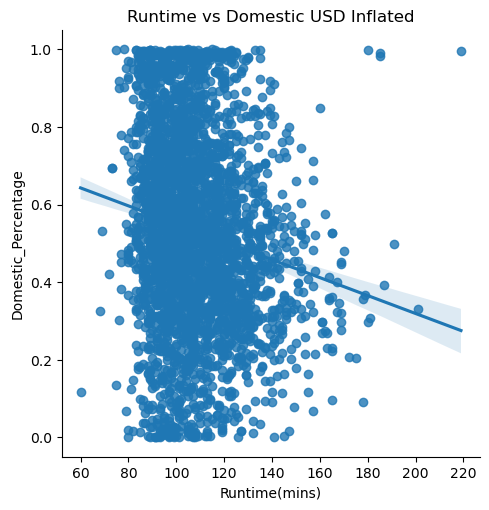

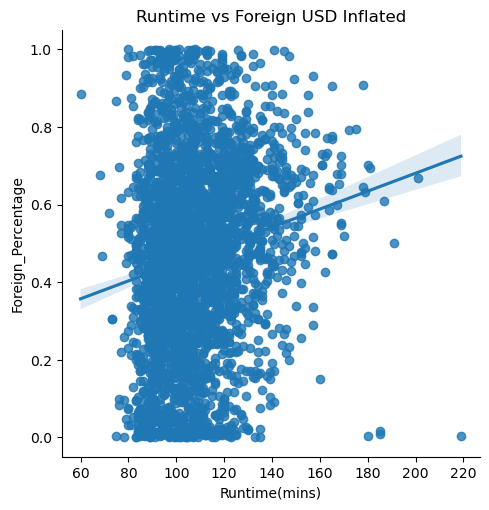

In [379]:
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

df_meg_copy = final_inflated.copy(deep=True)
df_meg_copy = df_meg_copy[['Name', 'Budget(USD)_Inflated', 'Runtime(mins)', 'Domestic_Percentage', 'Foreign_Percentage', 'Domestic(USD)_Inflated', 'Foreign(USD)_Inflated']]

print(f"Initial length of the dataset: {len(df_meg_copy)}")

# Remove rows with missing values in the relevant columns
df_meg_copy = df_meg_copy[df_meg_copy['Budget(USD)_Inflated'].notna()]
df_meg_copy = df_meg_copy[df_meg_copy['Runtime(mins)'].notna()]
df_meg_copy = df_meg_copy[df_meg_copy['Domestic_Percentage'].notna()]
df_meg_copy = df_meg_copy[df_meg_copy['Foreign_Percentage'].notna()]
df_meg_copy = df_meg_copy[df_meg_copy['Runtime(mins)'] != 0]

print(f"Length after removing all the NaNs: {len(df_meg_copy)}")
print("-----------------------------------------------")

# Plot for domestic percentage vs runtime
sns.lmplot(x='Runtime(mins)', y='Domestic_Percentage', data=df_meg_copy)
plt.title('Runtime vs Domestic USD Inflated')

# Pearson correlation for domestic percentage and runtime
print("Pearson coefficient on runtime and domestic USD Inflated:")
print(stats.pearsonr(df_meg_copy['Runtime(mins)'], df_meg_copy['Domestic_Percentage']))

# Plot for foreign percentage vs runtime
sns.lmplot(x='Runtime(mins)', y='Foreign_Percentage', data=df_meg_copy)
plt.title('Runtime vs Foreign USD Inflated')

# Pearson correlation for foreign percentage and runtime
print("Pearson coefficient on runtime and foreign USD Inflated:")
print(stats.pearsonr(df_meg_copy['Runtime(mins)'], df_meg_copy['Foreign_Percentage']))

# Display the first few rows of the filtered dataset
df_meg_copy.head()


## analysiss

In [72]:
correlation_df.c

Index(['Name', 'Year', 'Languages', 'Countries', 'Genres', 'Budget',
       'domestic_gross', 'domestic_percentage', 'foreign_gross',
       'foreign_percentage', 'worldwide_gross', 'Runtime', 'Rating', 'drama',
       'action', 'comedy', 'adventure', 'thriller', 'romance film',
       'crime fiction', 'fantasy', 'horror', 'family film', 'mystery',
       'science fiction', 'romantic comedy', 'indie', 'period piece',
       'film adaptation', 'crime thriller', 'romantic drama', 'comedy-drama',
       'animation'],
      dtype='object')

In [73]:
correlation_df.Rating.value_counts()

Rating
R                                                                     1446
PG-13                                                                 1163
PG                                                                     504
G                                                                       76
Not Rated                                                               44
NC-17                                                                   10
GP                                                                       2
G(Rating bulletin 2156, 1/26/2011)                                       2
R Edited                                                                 2
G(Rating bulletin 2111, 3/10/2010)                                       1
PG Rating                                                                1
PG on appeal. Originally rated R.                                        1
PG-13 Rating is                                                          1
Approved          

## regression

## What features should i use for the regression

ANOVA (Analysis of Variance): This test compares the mean foreign gross across different genres to see if the differences are statistically significant. If the p-value from the ANOVA test is low (typically < 0.05), it suggests that the genre is a significant factor influencing foreign gross.

If you’re unsure whether the genres will be important for your model, you can use tree-based models like Random Forest or Gradient Boosting Machines (GBMs), which can assess feature importance. These models provide a ranking of features based on how useful they are for making predictions.

For example, with a Random Forest Regressor:

In [412]:
correlation_df.columns

Index(['Name', 'Year', 'Countries', 'Genres', 'Budget(USD)_Inflated',
       'Domestic(USD)_Inflated', 'Domestic_Percentage',
       'Foreign(USD)_Inflated', 'Foreign_Percentage',
       'Worldwide(USD)_Inflated', 'Runtime(mins)', 'Rating', 'Audience_Score',
       'Critics_Score', 'Cumulative_Inflation', 'drama', 'comedy', 'action',
       'thriller', 'adventure', 'romance film', 'horror', 'fantasy', 'mystery',
       'crime fiction', 'romantic comedy', 'indie', 'biography',
       'science fiction', 'family film', 'period piece', 'crime', 'sci-fi',
       'romance', 'crime thriller'],
      dtype='object')

In [436]:
randoom_forest_df = correlation_df.copy(deep=True)
randoom_forest_df.drop(columns=[ 'Name','Countries','Genres','Domestic(USD)_Inflated', 'Domestic_Percentage', 'Worldwide(USD)_Inflated',
       
       'Foreign(USD)_Inflated', 'Rating'], inplace=True)

In [428]:
randoom_forest_df.columns

Index(['Year', 'Budget(USD)_Inflated', 'Foreign(USD)_Inflated',
       'Runtime(mins)', 'Audience_Score', 'Critics_Score',
       'Cumulative_Inflation', 'drama', 'comedy', 'action', 'thriller',
       'adventure', 'romance film', 'horror', 'fantasy', 'mystery',
       'crime fiction', 'romantic comedy', 'indie', 'biography',
       'science fiction', 'family film', 'period piece', 'crime', 'sci-fi',
       'romance', 'crime thriller'],
      dtype='object')

In [ ]:
correlation_df.column

Index(['Name', 'Year', 'Countries', 'Genres', 'Budget(USD)_Inflated',
       'Domestic(USD)_Inflated', 'Domestic_Percentage',
       'Foreign(USD)_Inflated', 'Foreign_Percentage',
       'Worldwide(USD)_Inflated', 'Runtime(mins)', 'Rating', 'Audience_Score',
       'Critics_Score', 'Cumulative_Inflation', 'drama', 'comedy', 'action',
       'thriller', 'adventure', 'romance film', 'horror', 'fantasy', 'mystery',
       'crime fiction', 'romantic comedy', 'indie', 'biography',
       'science fiction', 'family film', 'period piece', 'crime', 'sci-fi',
       'romance', 'crime thriller'],
      dtype='object')

In [437]:
from sklearn.ensemble import RandomForestRegressor

# Prepare the dataset (with one-hot encoded genres)
X = randoom_forest_df.drop(columns=['Foreign_Percentage'])
y = randoom_forest_df['Foreign_Percentage']

# Train a Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Display the feature importances
for feature, importance in zip(X.columns, importances):
    print(f"Feature: {feature}, Importance: {importance}")


Feature: Year, Importance: 0.06645019241246315
Feature: Budget(USD)_Inflated, Importance: 0.2524103419931261
Feature: Runtime(mins), Importance: 0.12219658071643386
Feature: Audience_Score, Importance: 0.14307654684020404
Feature: Critics_Score, Importance: 0.1515323897988501
Feature: Cumulative_Inflation, Importance: 0.0644525551267547
Feature: drama, Importance: 0.014238925739959272
Feature: comedy, Importance: 0.03574495156403648
Feature: action, Importance: 0.01213114212279512
Feature: thriller, Importance: 0.021681070390595022
Feature: adventure, Importance: 0.00959728084154573
Feature: romance film, Importance: 0.006064847013411
Feature: horror, Importance: 0.011521505318219936
Feature: fantasy, Importance: 0.0065303901879710195
Feature: mystery, Importance: 0.0071172594924564115
Feature: crime fiction, Importance: 0.0061890708437712825
Feature: romantic comedy, Importance: 0.00490042969159459
Feature: indie, Importance: 0.007772962912293839
Feature: biography, Importance: 0.0114

In [ ]:
## CHECK IF THE TYPE OF GENRE APART FORM BUDGET AND RUNTIME GETS ME A HIGHER PERCENTAGE IN FOREIGN GROSS...

## genres.. 

In [170]:
all_genres = (
    final_df['Genres']
    .dropna()  # Removing NaN values from the Genres column
    .str.replace('/', ', ')  # Replacing slashes with a comma and space
    .str.split(', ')  # Splitting by comma and space
    .explode()  # Flattening the list of genres into individual rows
    .value_counts()  # Counting occurrences of each genre
)
top_20_genres = all_genres.head(20).index
top_20_genres

Index(['drama', 'action', 'comedy', 'adventure', 'thriller', 'romance film',
       'crime fiction', 'romantic comedy', 'fantasy', 'family film', 'indie',
       'horror', 'period piece', 'mystery', 'science fiction',
       'crime thriller', 'film adaptation', 'romantic drama', 'comedy-drama',
       'teen'],
      dtype='object', name='Genres')

In [ ]:
# Creating a new DataFrame excluding rows with NaN in the relevant columns so it doesn't affect the final plots
filtered_df = final_df.dropna(subset=['Genres', 'Domestic(USD)', 'Foreign(USD)'])

# Initializing a dictionary to store gross for each genre in the top 20
genre_gross = {genre: {'Domestic(USD)': 0, 'Foreign(USD)': 0} for genre in top_20_genres}

# Iterating through the filtered dataset and summing gross for each genre
for idx, row in filtered_df.iterrows():
    genres = str(row['Genres']).replace('/', ', ').split(', ')# Splitting the genres of the current movie ('/' and ', ' considered as separations)
    domestic = row['Domestic(USD)']                          # Storing the corresponding Domestic(USD) value
    foreign = row['Foreign(USD)']                            # Storing the corresponding Foreign(USD) value
    
    for genre in genres:
        # If the genre is in the top 20, we sum the gross to that genre
        if genre in top_20_genres:
            genre_gross[genre]['Domestic(USD)'] += domestic
            genre_gross[genre]['Foreign(USD)'] += foreign


Genres
drama              1249
action             1046
comedy             1001
adventure           846
thriller            794
romance film        574
crime fiction       423
romantic comedy     293
fantasy             282
family film         276
indie               272
horror              269
period piece        251
mystery             249
science fiction     241
crime thriller      215
film adaptation     207
romantic drama      200
comedy-drama        184
teen                157
Name: count, dtype: int64